# Лабораторная работа 4

## Общая информация

Дата выдачи: 17.05.2016

Срок сдачи: **24.05.2016 23:59 MSK **

### О задании
Цель лабораторной работы №4 - закрепить навыки работы с библиотекой sklearn, в частности с логическими методами классификации, методом главных компонент и метриками качества. Все задания выполняются в рамках задачи многоклассовой классификации цифр по их рукописному начертанию.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *Username_(group)_Lab4.ipynb*, где Username — ваша фамилия на латинице, group — название группы (например, Struminsky_IAD-20_Lab4.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма *[ИАД-NN] - Лабораторная работа 4 - Фамилия Имя Отчество*. Правильное указание темы письма позволит нам быстрее на него отреагировать!

# Визуализация данных

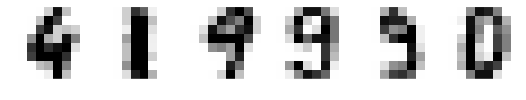

In [4]:
import sklearn.datasets
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
%matplotlib inline

digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target

fig, axes = plt.subplots(1, 6, figsize = (5, 5))
fig.set_figheight(1.5)
fig.set_figwidth(9)
for axis in axes:
    i = np.random.choice(X.shape[0])
    axis.set_axis_off()
    axis.imshow(1 - X[i].reshape(8, 8), cmap = 'gray', interpolation = 'None')

**Задача 1.1 (1 балл) ** Нормальзовать данные и воспользоваться методом главных компонент для снижения размерности данных до двух.

In [5]:
X_norm = (X - X.mean(axis = 1)[..., None]) / X.std(axis = 1)[..., None]
pca = PCA(n_components = 2).fit(X_norm)
X_pca = pca.transform(X_norm)

** Задача 1.2 (2 балла) ** Преобразованные данные можно изобразить на плоскости. Напишите код, который красит каждую точку плоскости в цвет, соответвующий исходной цифре. Какие цифры оказываются сконцентрированы в стороне? Какие цифры сильно накладываются друг на друга? Как это соотносится с их начертанием?

Убедитесь, что изображение будет достаточно большим, точки хорошо видны на графике и подписаны.

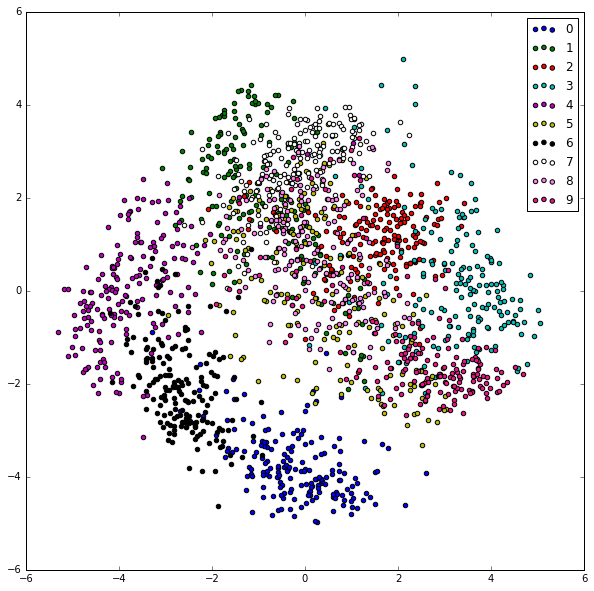

In [9]:
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#ff7ff0', '#ee1289')

plt.figure(figsize = (10, 10))

for i in range(10):
    plt.scatter(X_pca[y == i][:, 0], X_pca[y == i][:, 1],c = colors[i],label=str(i))
plt.legend()

0, 4 и 6 довольно четко выделяются. Гораздо хуже выделяются 2, 9, 7 и 3
1, 5 и 8 покрывают практически всю верхнюю часть
чем более похоже начертание цифр, тем сильнее наложение

# Подбор параметров в логических методах

** Задача 2.1 (1 балл) ** Разделите выборку на тренировочную и проверочную, обучите на тренировочной выборке дерево принятия решений. Подберите параметры дерева *max_depth* и *max_features* с помощью класса [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [23]:
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, grid_search, datasets

X_train, X_test, y_train, y_test = train_test_split(X_norm, y)
clf = DecisionTreeClassifier()

parameters = {'max_depth':[1,15], 'max_features':[1,64]} 
tree = grid_search.GridSearchCV(clf, parameters)
tree.fit(X_train, y_train)

target_names = ['%d' % i for i in range(10)]

y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        40
          1       0.72      0.78      0.75        40
          2       0.79      0.84      0.82        37
          3       0.81      0.88      0.84        49
          4       0.89      0.78      0.83        50
          5       0.80      0.84      0.82        44
          6       0.91      0.93      0.92        44
          7       0.82      0.85      0.84        48
          8       0.78      0.63      0.70        49
          9       0.85      0.82      0.83        49

avg / total       0.83      0.83      0.83       450



**Задача 2.2 (1 балл)** Выпишите явно подобранные параметры, score классификаторов на всей сетке параметров.

In [25]:
tree.best_params_, tree.grid_scores_

({'max_depth': 15, 'max_features': 64},
 [mean: 0.16778, std: 0.00919, params: {'max_depth': 1, 'max_features': 1},
  mean: 0.19302, std: 0.01545, params: {'max_depth': 1, 'max_features': 64},
  mean: 0.55679, std: 0.06746, params: {'max_depth': 15, 'max_features': 1},
  mean: 0.84855, std: 0.02855, params: {'max_depth': 15, 'max_features': 64}])

** Задача 2.3 (1 балл) ** Обучите на тренировочной выборке случайный лес. Подберите параметр леса *num_estimators* с помощью класса [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = grid_search.GridSearchCV(RandomForestClassifier(),{'n_estimators':[3,15]}).fit(X_train,y_train)

**Задача 2.4 (1 балл) ** Выведите отчет о классификации [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [27]:
target_names = ['%d' % i for i in range(10)]
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98        40
          1       0.90      0.95      0.93        40
          2       0.88      1.00      0.94        37
          3       0.92      0.92      0.92        49
          4       1.00      1.00      1.00        50
          5       0.98      0.98      0.98        44
          6       1.00      1.00      1.00        44
          7       0.96      1.00      0.98        48
          8       0.93      0.78      0.84        49
          9       0.96      0.90      0.93        49

avg / total       0.95      0.95      0.95       450



# Визуализация выхода алгоритма

**Задание 3.1 (2 балла) ** Для цифры с наименьшим f1-score из третьего задания построить визуализацию: нарисовать все точки тестовых данных, выделив выбранную цифру отдельным цветом.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1797 but corresponding boolean dimension is 450


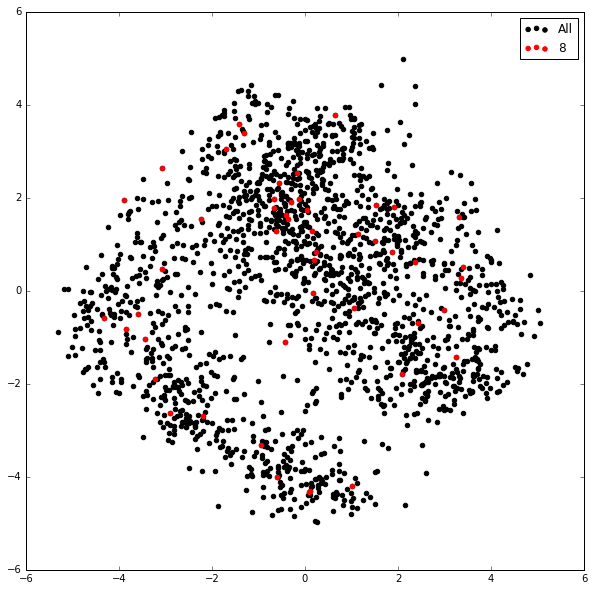

In [31]:
plt.figure(figsize=(10, 10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], color = 'k', label = 'All')
plt.scatter(X_pca[y_test == 8][:, 0], X_pca[y_test == 8][:, 1],color = 'r', label=str(8))
plt.legend()

** Задание 3.2 (1 балл) ** Обучить случайный лес отличать выбранную цифру от остальных. Построить ROC-кривую полученного классификатора, посчитать метрику ROC-AUC

In [40]:
from sklearn import metrics

def new_class(y):
    if y == 8:
        return 1
    else:
        return 0

for i in range(len(y)):  #новые ответы согласно двухклассовой классификации
    y[i] = new_class(y[i])
            
X_train, X_test, y_train, y_test = train_test_split(X_norm, y) 
forest2 = grid_search.GridSearchCV(RandomForestClassifier(),{'n_estimators':[3,15]}).fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:526: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


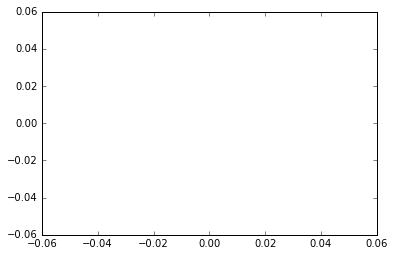

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [45]:
from sklearn import metrics

scores = forest2.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.show()

print('%.2f' % metrics.roc_auc_score(y_test, scores))